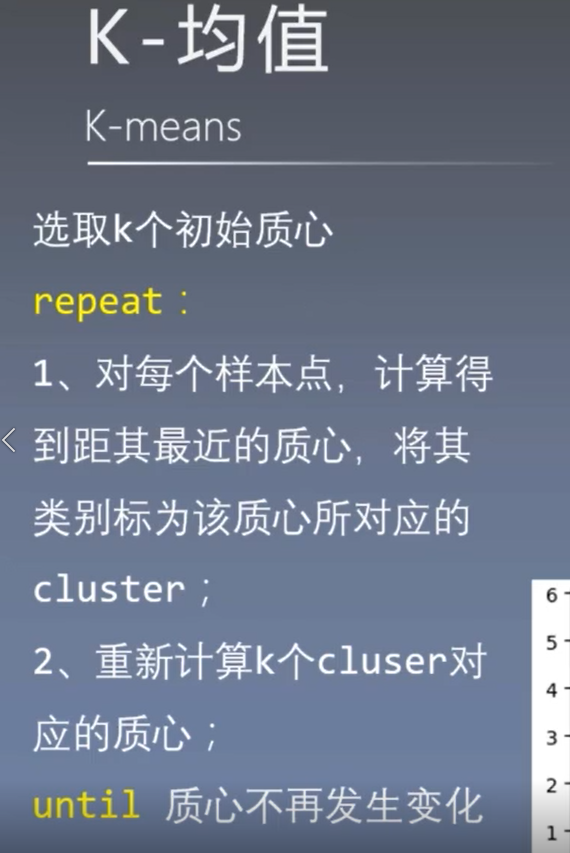

In [34]:
# K-means 算法的代码实现

import numpy as np
import matplotlib.pyplot as plt

In [35]:
def load_data():
    data = np.loadtxt('data/cluster_data.csv',delimiter=',')
    return data

C:\Users\limenghua\AppData\Local\Temp\ipykernel_14760\399619937.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='cm_dark', s=20)


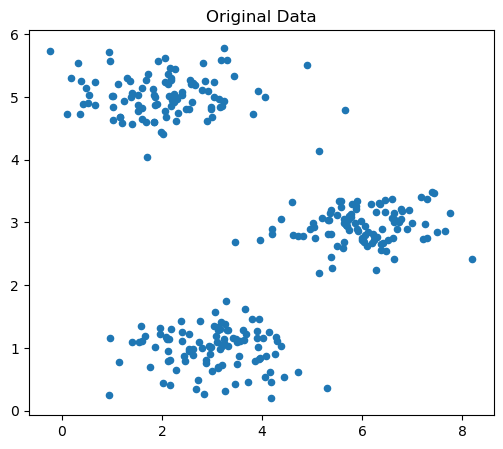

In [36]:
X = load_data()

fig = plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], cmap='cm_dark', s=20)
plt.title('Original Data')
plt.show()

In [37]:
len(X)

300

# 随机初始化质心
实际是从数据点X中随机选择K个点作为初始质心。如果不从X中选取，而是随机初始，也是可以的，只是没有前者的收敛性好

In [38]:
def kMeansInitCentroids(X, K):
    centers=[]
    # randomly choose K data points as initial centroids
    index = np.random.randint(0,X.shape[0], size=K)
    centers = X[index]
    return np.array(centers)

In [39]:
centroids = kMeansInitCentroids(X,3)
print(centroids)

[[3.71363659 0.45813208]
 [5.52908677 3.33681576]
 [6.35257892 3.2908545 ]]


In [40]:
def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in X to the dataset X
    """
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        min_dist = np.inf
        for j in range(k):
            #计算距离，使用欧式距离
            dist = np.sum((X[i,:] - centroids[j,:])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

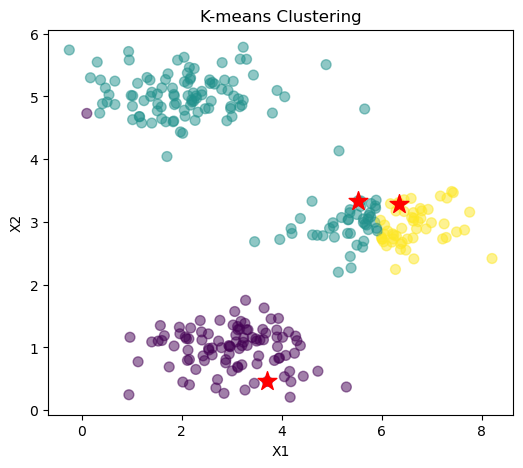

In [41]:
y_temp = findClosestCentroids(X, centroids)

fig2 = plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_temp, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.title('K-means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [42]:
def recalculate_centroids(X,k, labels):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = np.mean(X[labels == i], axis=0)
    return new_centroids

In [43]:
# 封装成类

class KMeans:
    def __init__(self, n_clusters,max_iter=100):
        self.n_clusters_ = n_clusters
        self.cluster_centers_ = None
        self.labels_ = None
        self.max_iter_ = max_iter

    def kMeansInitCentroids(self,X):
        # randomly choose K data points as initial centroids
        index = np.random.randint(0,X.shape[0], size=self.n_clusters_)
        self.cluster_centers_ = X[index]
        return self.cluster_centers_
    
    def findClosestCentroids(self,X):
        """
        Returns the closest centroids in X to the dataset X
        """
        m = X.shape[0]
        k = self.n_clusters_
        idx = np.zeros(m)
        centroids = self.cluster_centers_
        for i in range(m):
            min_dist = np.inf
            for j in range(k):
                #计算距离，使用欧式距离
                dist = np.sum((X[i,:] - centroids[j,:])**2)
                if dist < min_dist:
                    min_dist = dist
                    idx[i] = j
        return idx 
    
    def recalculateCentroids(self,X, labels):
        new_centroids = np.zeros((self.n_clusters_, X.shape[1]))
        for i in range(self.n_clusters_):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids
    
    def fit(self, X):
        # 初始化中心
        self.kMeansInitCentroids(X)
        labels = None
        for i in range(self.max_iter_):
            # 计算每个样本到各个中心的距离
            labels = self.findClosestCentroids(X)
            # 计算新的中心
            new_centroids = self.recalculateCentroids(X, labels)
            # 判断是否收敛
            if (new_centroids == self.cluster_centers_).all():
                break
            self.cluster_centers_ = new_centroids
        self.labels_ = labels
    
    def predict(self, X):
        labels = self.findClosestCentroids(X)
        return labels


In [44]:
modle = KMeans(3)
modle.fit(X)
labels = modle.labels_
centroids = modle.cluster_centers_
print(labels)

[2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


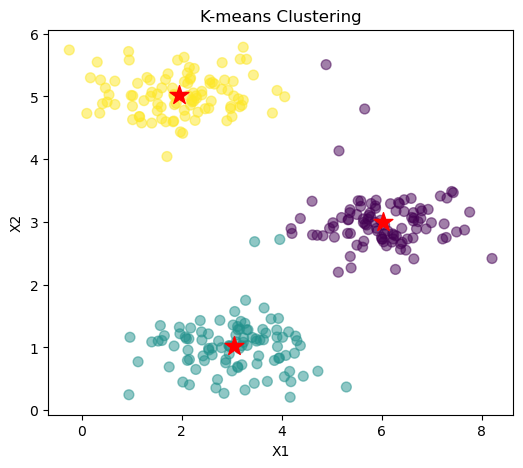

In [45]:
# 结果可视化

fig4 = plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.title('K-means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()